# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

In [1]:
from sympy import *
import numpy as np
import math
import matplotlib.pyplot as plt

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

In [2]:
x = Symbol('x')

y = Function('y')
y = sin(x)

z = Function('z')
z = cos(x)

w = Function('w')
w = 1/(cos(x) + sin(2*x))

In [3]:
y

sin(x)

In [4]:
z

cos(x)

In [5]:
w

1/(sin(2*x) + cos(x))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [6]:
g = Function('g')
g = y * z
g

sin(x)*cos(x)

In [7]:
g_ = simplify(Derivative(g,x).doit())
simplify(g_)

cos(2*x)

(c) Grafica $w(x)$ en el rango $[0,1]$

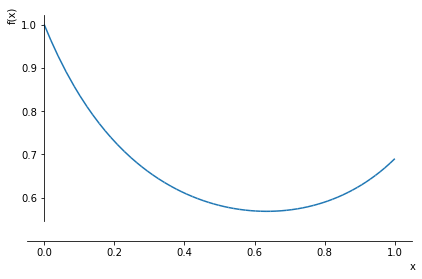

In [20]:
p1 = plot(w,(x,0,1),axis_center=(0,0.5)) 

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

In [21]:
W = Integral(w,x) # expresar como integral indefinida
W

Integral(1/(sin(2*x) + cos(x)), x)

In [22]:
res = integrate(w,(x,0,1)).doit() #expresar w como integral definida
res.evalf() # Evaluar la integral

0.659629884824582

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

$lim_{x\to 0} y(x)$

In [23]:
limit(y,x,0)

0

$lim_{x\to 0} z(x)$

In [24]:
limit(z,x,0)

1

$lim_{x\to 0} g(x)$

In [25]:
limit(g,x,0)

0

$lim_{x\to 0} w(x)$

In [26]:
limit(w,x,0)

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [27]:
plt.style.use("ggplot")

# Serie de Taylor grado n alrededor de x0 de la función 'f'
def taylor(f,x0,n):
    i = 0
    s = 0
    while i <= n:
        s = s + (f.diff(x,i).subs(x,x0))/(math.factorial(i))*(x-x0)**i
        i += 1
    return s

taylor(y,0,3)

-x**3/6 + x

In [28]:
taylor(z,0,3)

1 - x**2/2

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [29]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [30]:
class Atractor:
    
    def __init__(self, a = 0.13, b = 0.2, c = 6.5):
        self.a = a
        self.b = b
        self.c = c
        
        
    def x(self):
        return self.trajectory[:,0]
    
    def y(self):
        return self.trajectory[:,1]
    
    def z(self):
        return self.trajectory[:,2]
    
    def plot2d(self):
        fig, ax = plt.subplots(3,1, figsize=(10,8), sharex = True)

        ax[0].plot(self.tau, self.x(), label="x(t)", color="red")
        ax[1].plot(self.tau, self.y(), label="y(t)", color="blue")
        ax[2].plot(self.tau, self.z(), label="z(t)", color="green")

        ax[0].set_ylabel("x(t)")
        ax[0].set_xlabel("tiempo (s)")

        ax[1].set_ylabel("y(t)")
        ax[1].set_xlabel("tiempo (s)")

        ax[2].set_ylabel("z(t)")
        ax[2].set_xlabel("tiempo (s)")
        
        
    def plot3d(self):
        fig = plt.figure()
        ax2 = fig.gca(projection='3d')
        ax2.plot(self.x(), self.y(), self.z(), linewidth=1, c='c', label='Trayectoria')
        plt.xlabel("x")
        plt.ylabel("y")
        ax2.legend(loc='best')
        ax2.view_init(30, -60)
        
    
    def initial_conditions(self, x_i, y_i, z_i):
        self.x_i = x_i
        self.y_i = y_i
        self.z_i = z_i
        
    def dynamics(self, state, t):
        g0 = -state[1] -state[2]
        g1 = state[0] + self.a * state[1]
        g2 = self.b + state[2] * (state[0] - self.c)
        return np.array([g0, g1, g2])
        
    def integrate(self, num_steps, t_i, t_f, method):
        
        self.tau, self.dt = np.linspace(t_i, t_f, num=num_steps, retstep=True)
        self.trajectory = np.zeros([num_steps, 3])
        self.trajectory[0,0] = self.x_i
        self.trajectory[0,1] = self.y_i
        self.trajectory[0,2] = self.z_i
        
        for j in range(N-1):
            self.trajectory[j+1] = method(self.trajectory[j], self.tau[j], self.dt, self.dynamics) 

In [31]:
a1 = Atractor()
a1.initial_conditions(x_i = 0, y_i = 0, z_i = 0)

In [32]:
N = 100000
tiempo_inicial = 0.0
tiempo_final = 100

In [33]:
a1.integrate(N, tiempo_inicial, tiempo_final, RK2)

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

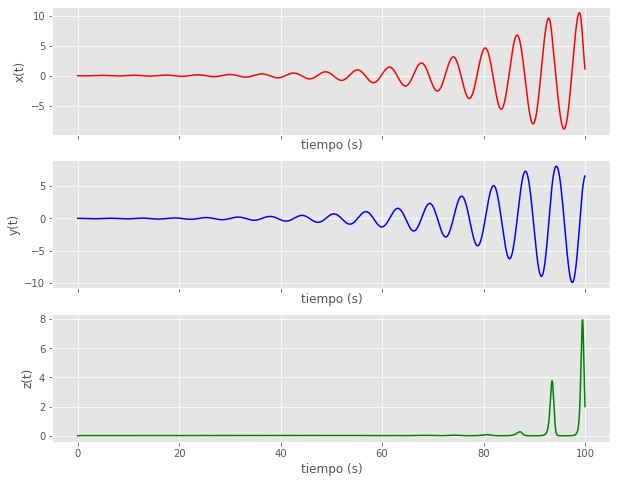

In [34]:
a1.plot2d()

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

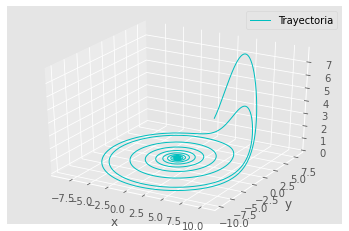

In [35]:
a1.plot3d()